In [5]:
import requests
url = 'https://apitempo.inmet.gov.br/estacao/2021-06-01/2022-05-29/A201'
resultado = requests.get(url)

In [6]:
import json
dados_org = resultado.json()
dados_str = json.dumps(dados_org)


In [7]:
import pandas as pd
import numpy as np

In [8]:
dados_tabla = pd.read_json(dados_str)
dados_tabla

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,BELÉM,1009.7,28.7,-1.411228,1009.7,PA,-0.6,22.3,26.5,-48.439512,...,0.4,21.9,26.8,13.1,3.5,29.0,26.5,78.0,A201,0
1,BELÉM,1010.1,28.6,-1.411228,1010.1,PA,-0.4,22.4,26.4,-48.439512,...,0.1,22.1,26.5,13.1,2.7,28.0,26.4,78.0,A201,100
2,BELÉM,1010.1,28.2,-1.411228,1010.2,PA,-1.1,22.5,25.8,-48.439512,...,0.5,22.1,26.4,13.0,2.6,28.0,25.8,82.0,A201,200
3,BELÉM,1010.1,28.8,-1.411228,1010.2,PA,-1.1,23.8,25.6,-48.439512,...,0.5,22.6,25.8,13.0,2.0,27.0,25.6,90.0,A201,300
4,BELÉM,1009.6,28.7,-1.411228,1010.1,PA,-0.7,24.2,25.3,-48.439512,...,0.3,23.9,25.6,13.0,2.5,27.0,25.3,93.0,A201,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8707,BELÉM,1005.1,33.8,-1.411228,1005.7,PA,1575.9,25.0,29.0,-48.439512,...,1.6,23.0,31.7,14.6,6.7,36.0,31.5,69.0,A201,1900
8708,BELÉM,1005.3,32.4,-1.411228,1005.4,PA,1019.8,23.6,30.5,-48.439512,...,1.3,23.6,31.5,13.7,4.0,36.0,30.5,67.0,A201,2000
8709,BELÉM,1006.5,28.3,-1.411228,1006.5,PA,173.4,24.2,25.1,-48.439512,...,1.2,23.4,30.5,13.1,5.9,33.0,25.4,93.0,A201,2100
8710,BELÉM,1007.1,28.3,-1.411228,1007.1,PA,3.3,23.9,24.9,-48.439512,...,0.7,23.8,25.4,13.0,3.8,29.0,25.0,94.0,A201,2200


In [9]:
dados = dados_tabla[['DT_MEDICAO', 'HR_MEDICAO', 'TEM_INS', 'UMD_INS', 'RAD_GLO']]
dados

,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS,RAD_GLO
0,2021-06-01,0,26.5,78.0,-0.6
1,2021-06-01,100,26.4,78.0,-0.4
2,2021-06-01,200,25.8,82.0,-1.1
3,2021-06-01,300,25.6,90.0,-1.1
4,2021-06-01,400,25.3,93.0,-0.7
...,...,...,...,...,...
8707,2022-05-29,1900,31.5,69.0,1575.9
8708,2022-05-29,2000,30.5,67.0,1019.8
8709,2022-05-29,2100,25.4,93.0,173.4
8710,2022-05-29,2200,25.0,94.0,3.3


# Renomia o titulo do nosso dados

In [10]:
dados.columns = ['DATA','HORARIO', 'TEMPERATURA', 'UMIDADE', 'RADIACAO']

In [11]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
0,2021-06-01,0,26.5,78.0,-0.6
1,2021-06-01,100,26.4,78.0,-0.4
2,2021-06-01,200,25.8,82.0,-1.1
3,2021-06-01,300,25.6,90.0,-1.1
4,2021-06-01,400,25.3,93.0,-0.7
...,...,...,...,...,...
8707,2022-05-29,1900,31.5,69.0,1575.9
8708,2022-05-29,2000,30.5,67.0,1019.8
8709,2022-05-29,2100,25.4,93.0,173.4
8710,2022-05-29,2200,25.0,94.0,3.3


<AxesSubplot:title={'center':'TEMPERATURA'}, xlabel='HORARIO'>

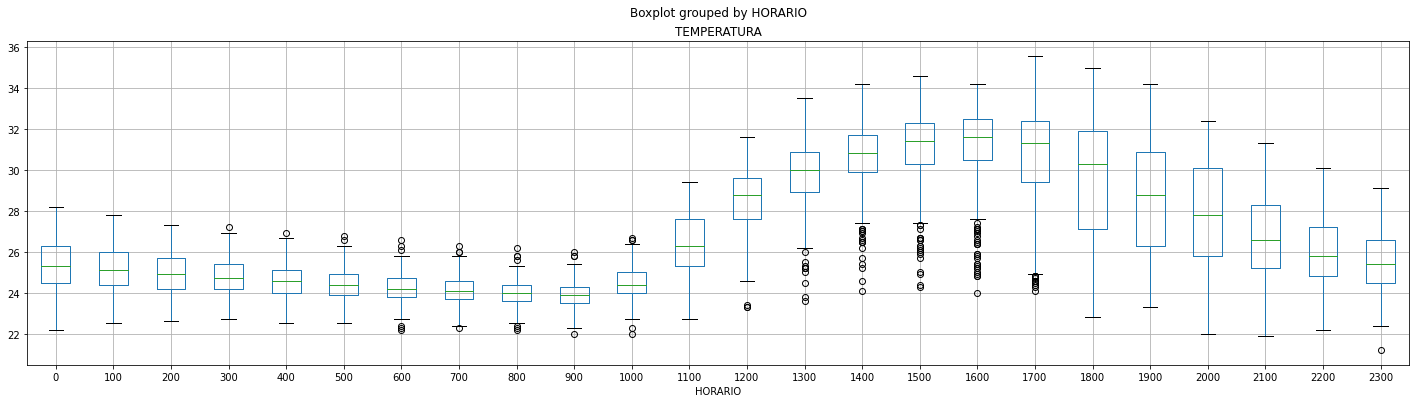

In [12]:
dados.boxplot("TEMPERATURA", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'UMIDADE'}, xlabel='HORARIO'>

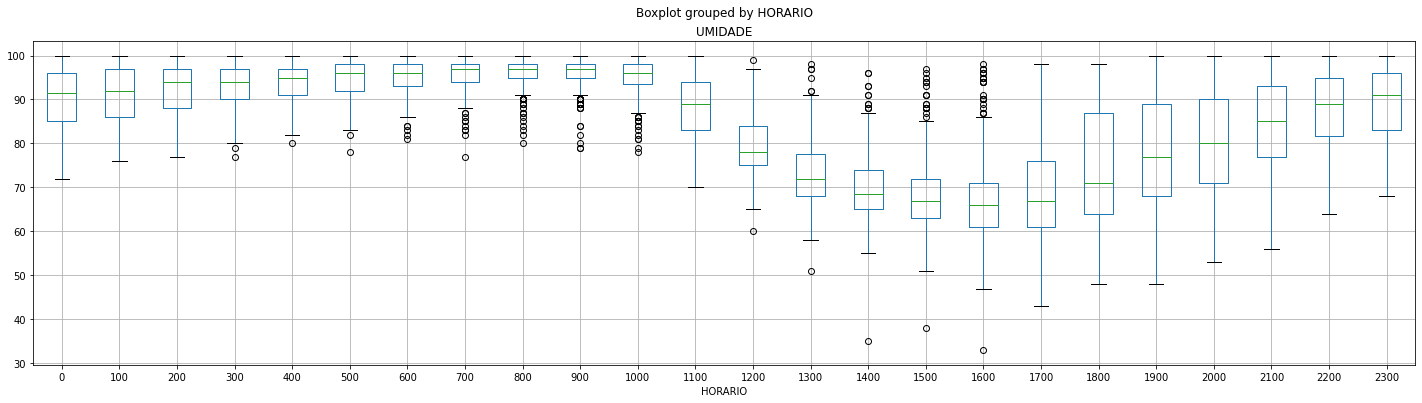

In [13]:
dados.boxplot("UMIDADE", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'RADIACAO'}, xlabel='HORARIO'>

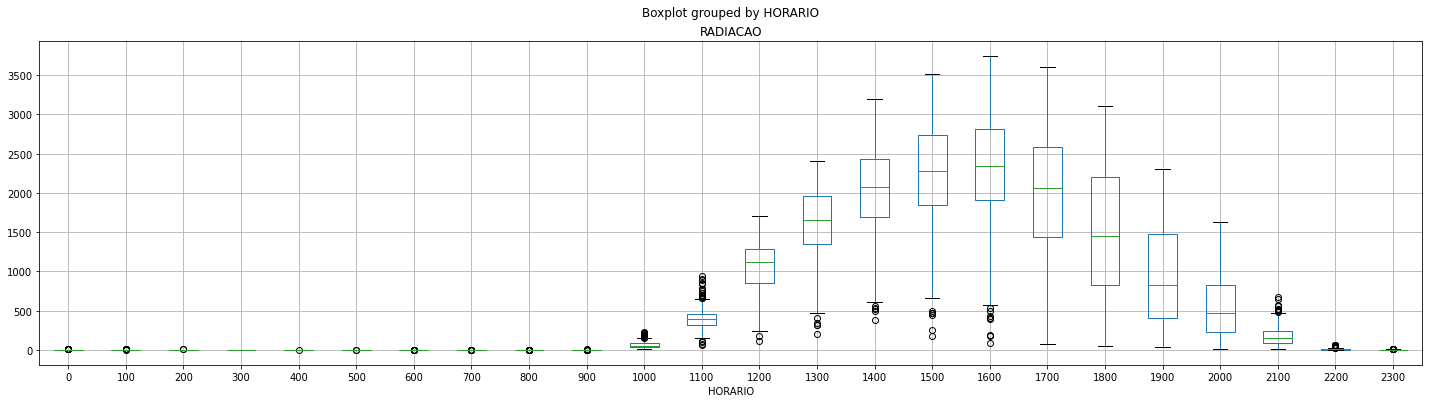

In [14]:
dados.boxplot("RADIACAO", by='HORARIO', figsize=(24,6))

# Verificando a suma de dados null 

In [15]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA           0.000000
HORARIO        0.000000
TEMPERATURA    0.010445
UMIDADE        0.034665
RADIACAO       0.010445
dtype: float64

In [16]:
dados[pd.isnull(dados['TEMPERATURA'])]

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
2864,2021-09-28,800,NaN,NaN,NaN
2865,2021-09-28,900,NaN,NaN,NaN
2866,2021-09-28,1000,NaN,NaN,NaN
2867,2021-09-28,1100,NaN,NaN,NaN
2868,2021-09-28,1200,NaN,NaN,NaN
...,...,...,...,...,...
6575,2022-03-01,2300,NaN,NaN,NaN
6625,2022-03-04,100,NaN,NaN,NaN
6722,2022-03-08,200,NaN,NaN,NaN
6817,2022-03-12,100,NaN,NaN,NaN


In [17]:
dados = dados.fillna(method='ffill')

In [18]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA           0.0
HORARIO        0.0
TEMPERATURA    0.0
UMIDADE        0.0
RADIACAO       0.0
dtype: float64

# verificando se nosso dados são numéricos

In [19]:
dados.dtypes

DATA            object
HORARIO          int64
TEMPERATURA    float64
UMIDADE        float64
RADIACAO       float64
dtype: object

<AxesSubplot:>

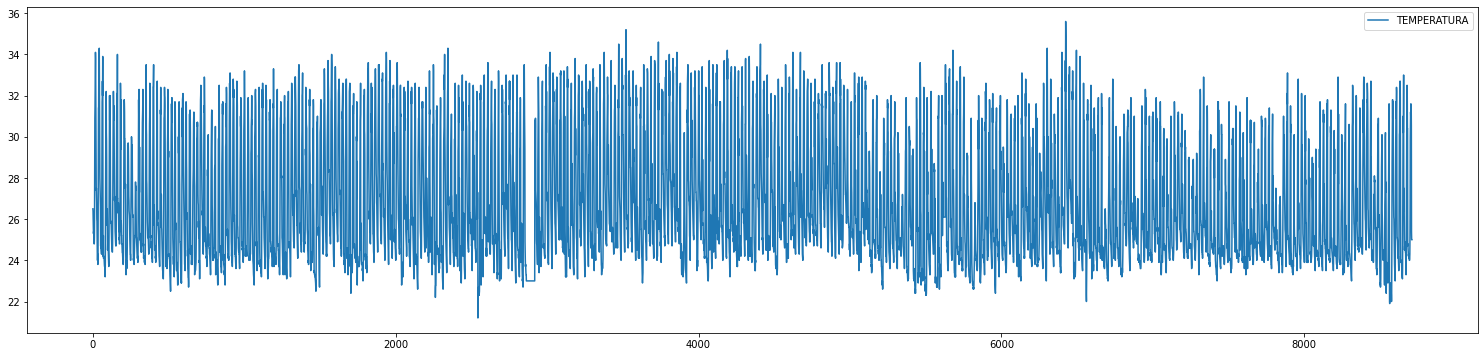

In [20]:
dados[['TEMPERATURA']].plot(figsize=(26,6))

# Agrupando os dados por horário

In [21]:
dados.groupby(dados.HORARIO).sum()

,TEMPERATURA,UMIDADE,RADIACAO
HORARIO,,,
0,9216.9,32667.0,-383.0
100,9145.4,33024.0,-486.4
200,9066.4,33436.0,-572.3
300,8991.2,33793.0,-658.5
400,8918.6,34086.0,-673.6
500,8852.2,34319.0,-701.2
600,8797.1,34521.0,-704.8
700,8746.5,34688.0,-707.3
800,8701.7,34800.0,-713.4


### Criando novos colunas para Temperatura da amahão, Umidade da amahão e Radiação da amahão na tabla  

In [22]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
0,2021-06-01,0,26.5,78.0,-0.6
1,2021-06-01,100,26.4,78.0,-0.4
2,2021-06-01,200,25.8,82.0,-1.1
3,2021-06-01,300,25.6,90.0,-1.1
4,2021-06-01,400,25.3,93.0,-0.7
...,...,...,...,...,...
8707,2022-05-29,1900,31.5,69.0,1575.9
8708,2022-05-29,2000,30.5,67.0,1019.8
8709,2022-05-29,2100,25.4,93.0,173.4
8710,2022-05-29,2200,25.0,94.0,3.3


### Criando novos colunas para Temperatura da amahão, Umidade da amahão e Radiação da amahão na tabla 

In [23]:
dados['TEMP_AMANHAO'] = dados.shift(-1)['TEMPERATURA']
dados['TEMP_MES_MIX'] = dados['TEMPERATURA'].rolling(30).mean()

In [24]:
dados['UMID_AMANHAO'] = dados.shift(-1)['UMIDADE']
dados['UMID_MES_MIX'] = dados['UMIDADE'].rolling(30).mean()

In [25]:
dados['RADI_AMANHAO'] = dados.shift(-1)['RADIACAO']
dados['RADI_MES_MIX'] = dados['RADIACAO'].rolling(30).mean()

In [26]:
dados['HORARIO_ATUAL'] = dados.shift(3)['HORARIO']

In [27]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO,TEMP_AMANHAO,TEMP_MES_MIX,UMID_AMANHAO,UMID_MES_MIX,RADI_AMANHAO,RADI_MES_MIX,HORARIO_ATUAL
0,2021-06-01,0,26.5,78.0,-0.6,26.4,NaN,78.0,NaN,-0.4,NaN,NaN
1,2021-06-01,100,26.4,78.0,-0.4,25.8,NaN,82.0,NaN,-1.1,NaN,NaN
2,2021-06-01,200,25.8,82.0,-1.1,25.6,NaN,90.0,NaN,-1.1,NaN,NaN
3,2021-06-01,300,25.6,90.0,-1.1,25.3,NaN,93.0,NaN,-0.7,NaN,0.0
4,2021-06-01,400,25.3,93.0,-0.7,25.4,NaN,91.0,NaN,-1.2,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8707,2022-05-29,1900,31.5,69.0,1575.9,30.5,27.346667,67.0,84.100000,1019.8,1056.236667,1600.0
8708,2022-05-29,2000,30.5,67.0,1019.8,25.4,27.326667,93.0,84.100000,173.4,1001.346667,1700.0
8709,2022-05-29,2100,25.4,93.0,173.4,25.0,27.140000,94.0,84.900000,3.3,915.753333,1800.0
8710,2022-05-29,2200,25.0,94.0,3.3,25.0,26.890000,95.0,85.933333,1.4,815.193333,1900.0


### Deletando NULL

In [28]:
dados = dados.iloc[30:,:].copy()
dados = dados.iloc[:-1, :].copy()

In [29]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO,TEMP_AMANHAO,TEMP_MES_MIX,UMID_AMANHAO,UMID_MES_MIX,RADI_AMANHAO,RADI_MES_MIX,HORARIO_ATUAL
30,2021-06-02,600,24.0,97.0,-3.5,24.0,27.670000,97.0,78.700000,-2.4,628.220000,300.0
31,2021-06-02,700,24.0,97.0,-2.4,24.3,27.590000,96.0,79.333333,-2.3,628.153333,400.0
32,2021-06-02,800,24.3,96.0,-2.3,23.8,27.540000,99.0,79.800000,-2.8,628.113333,500.0
33,2021-06-02,900,23.8,99.0,-2.8,24.5,27.480000,99.0,80.100000,46.4,628.056667,600.0
34,2021-06-02,1000,24.5,99.0,46.4,26.7,27.453333,86.0,80.300000,459.6,629.626667,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8706,2022-05-29,1800,31.0,66.0,1980.0,31.5,27.323333,69.0,84.066667,1575.9,1070.353333,1500.0
8707,2022-05-29,1900,31.5,69.0,1575.9,30.5,27.346667,67.0,84.100000,1019.8,1056.236667,1600.0
8708,2022-05-29,2000,30.5,67.0,1019.8,25.4,27.326667,93.0,84.100000,173.4,1001.346667,1700.0
8709,2022-05-29,2100,25.4,93.0,173.4,25.0,27.140000,94.0,84.900000,3.3,915.753333,1800.0


In [30]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1, solver='auto', fit_intercept=True, max_iter=None, tol=0.001, copy_X=True)

In [31]:
from sklearn.metrics import mean_absolute_percentage_error

In [32]:
numerio_de_dados = len(dados)+9

In [33]:
def criar_previsões_temp(preditores, dados, reg):
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["TEMP_AMANHAO"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["TEMP_AMANHAO"],preditores)
    conjunto = pd.concat([teste['TEMP_AMANHAO'], pd.Series(preditores, index=teste.index )], axis=1)
    conjunto.columns = ['ATUAL_TEMPERATURA', 'PREVISOES_TEMPERATURA']
    conjunto[['DATA','HORARIO']] = teste[['DATA','HORARIO_ATUAL']]
    return erro, conjunto

In [34]:
def criar_previsões_umid(preditores, dados, reg):
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["UMID_AMANHAO"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["UMID_AMANHAO"],preditores)
    conjunto = pd.concat([teste["UMID_AMANHAO"], pd.Series(preditores, index=teste.index)], axis=1)
    conjunto.columns = ["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]
    return erro, conjunto

In [35]:
def criar_previsões_radi(preditores, dados, reg):
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["RADI_AMANHAO"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["RADI_AMANHAO"],preditores)
    conjunto = pd.concat([teste["RADI_AMANHAO"], pd.Series(preditores, index=teste.index)], axis=1)
    conjunto.columns = ["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]
    return erro, conjunto

In [36]:
preditores = ['HORARIO', 'TEMPERATURA','UMIDADE', 'RADIACAO','TEMP_MES_MIX', 'UMID_MES_MIX','RADI_MES_MIX']

In [37]:
temp_erro, temp_prevesao = criar_previsões_temp(preditores, dados, reg)

In [38]:
umid_erro, umid_prevesao = criar_previsões_umid(preditores, dados, reg)

In [39]:
radi_prevesao
 

NameError: name 'radi_prevesao' is not defined

In [ ]:
radi_erro, radi_prevesao = criar_previsões_radi(preditores, dados, reg)

In [ ]:
previsoes_dados = temp_prevesao

In [40]:
previsoes_dados[["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]] = umid_prevesao[["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]]

NameError: name 'previsoes_dados' is not defined

In [41]:
previsoes_dados

NameError: name 'previsoes_dados' is not defined

In [42]:
previsoes_dados[["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]] = radi_prevesao[["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]]

NameError: name 'radi_prevesao' is not defined

In [43]:
previsoes_dados = previsoes_dados[['DATA','HORARIO','ATUAL_TEMPERATURA','PREVISOES_TEMPERATURA','ATUAL_UMIDADE','PREVISOES_UMIDADE','ATUAL_RADIACAO','PREVISOES_RADIACAO']]

NameError: name 'previsoes_dados' is not defined

In [44]:
umid_erro

0.04378425462237366

In [45]:
temp_erro

0.02512381458217279

In [46]:
radi_erro

NameError: name 'radi_erro' is not defined

In [47]:
previsoes_dados.boxplot("PREVISOES_TEMPERATURA", by='HORARIO', figsize=(24,6))

NameError: name 'previsoes_dados' is not defined

In [48]:
previsoes_dados.boxplot("PREVISOES_UMIDADE", by='HORARIO', figsize=(24,6))


NameError: name 'previsoes_dados' is not defined

In [49]:
previsoes_dados.boxplot("PREVISOES_RADIACAO", by='HORARIO', figsize=(24,6))

NameError: name 'previsoes_dados' is not defined